The following image shows the DOS for the Tantalum defect:

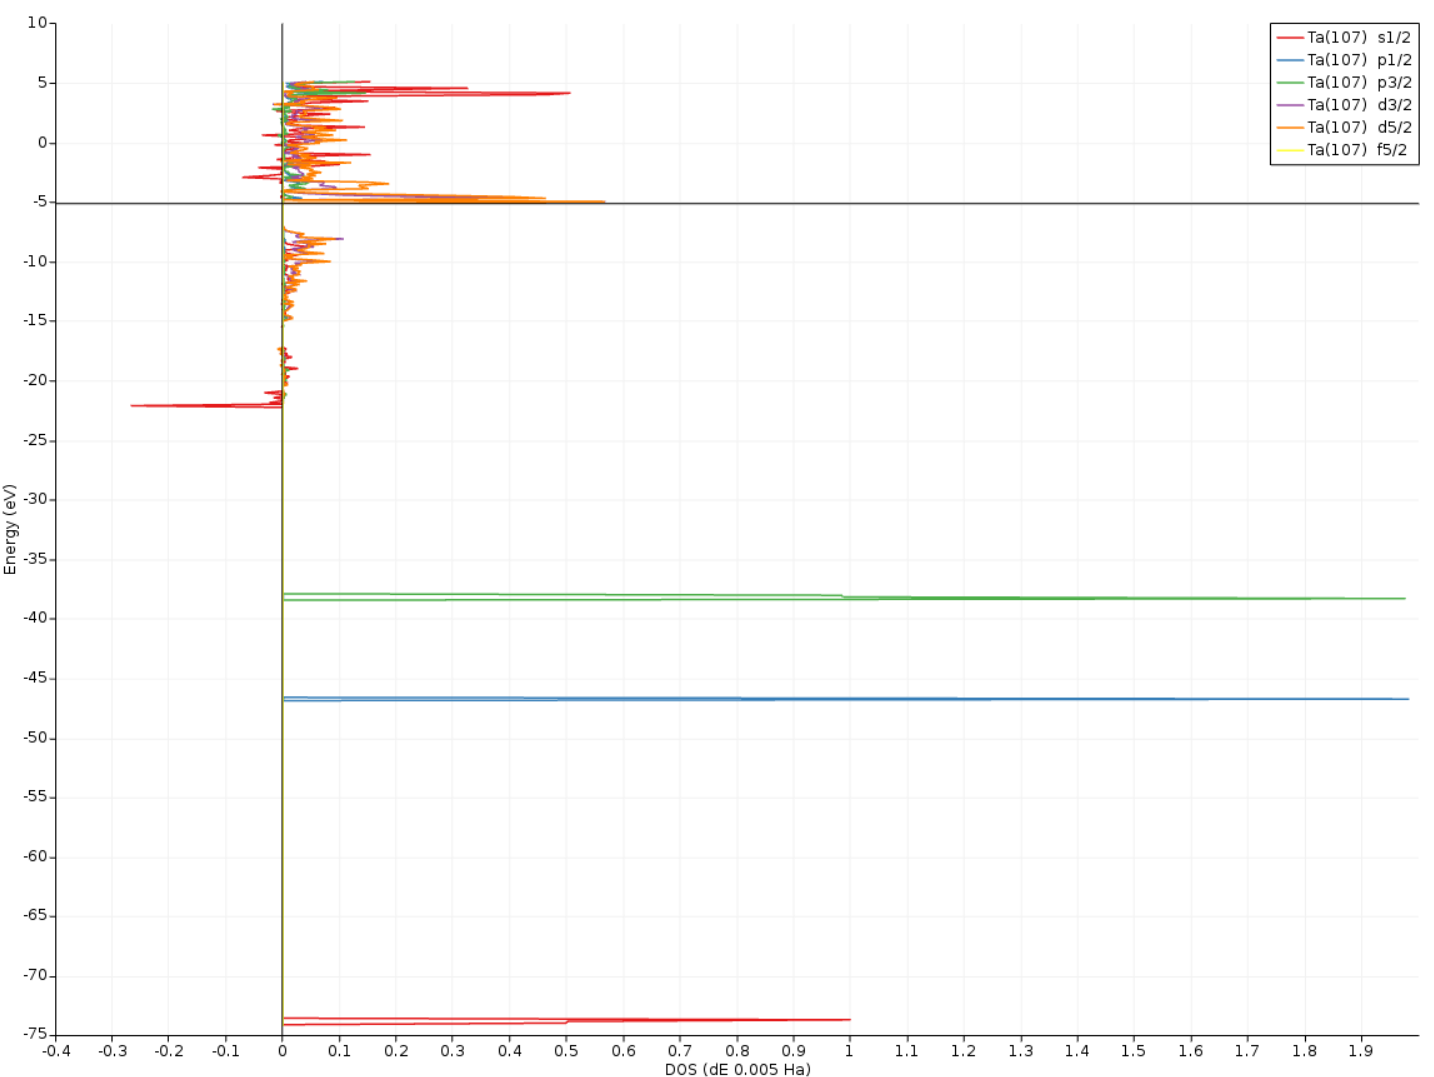

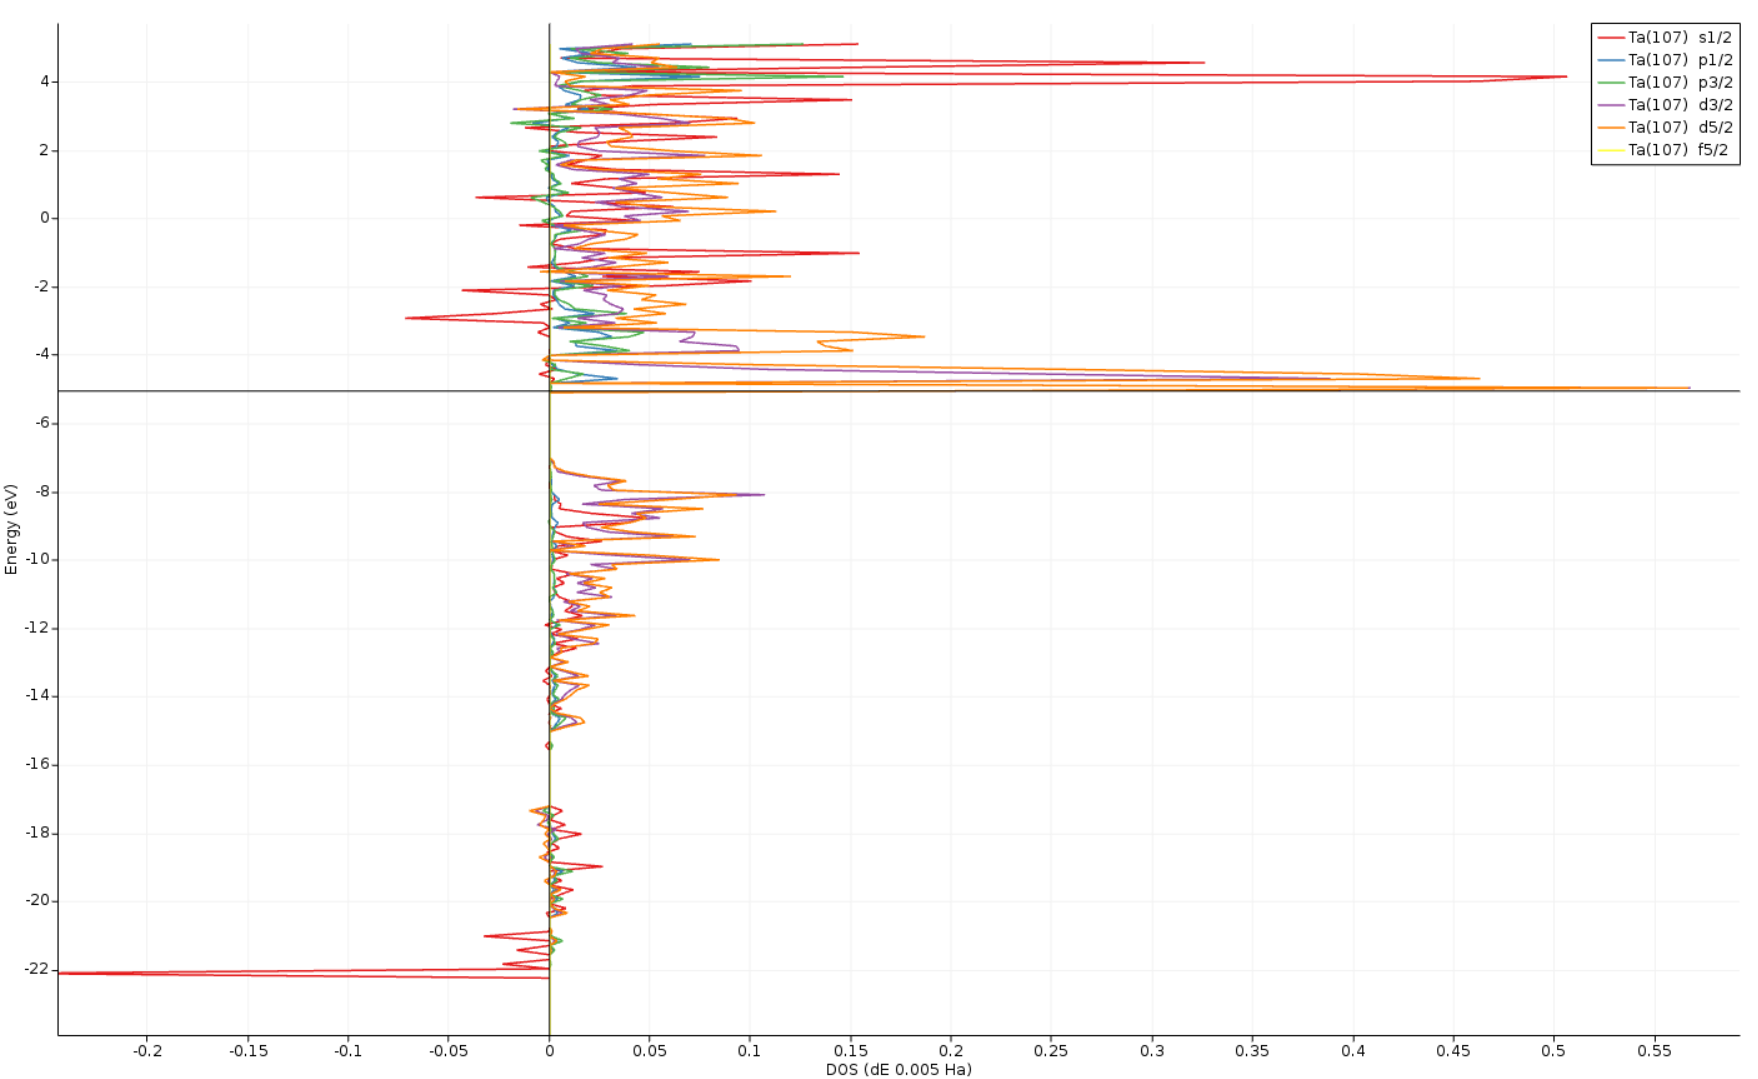

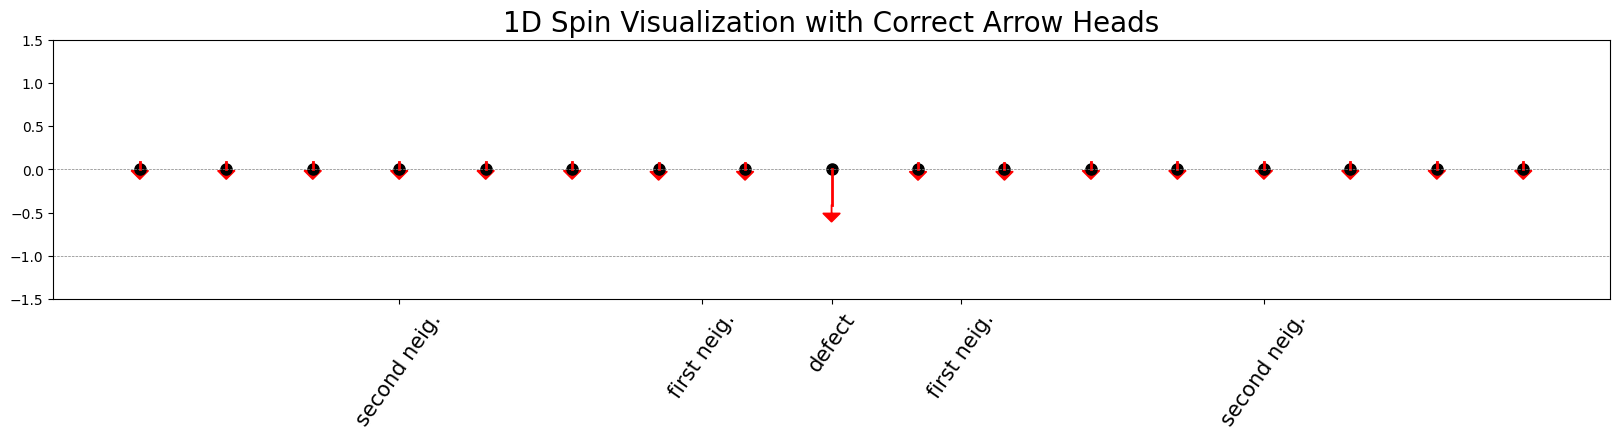

In [1]:
import matplotlib.pyplot as plt

# First is the defect
# Next 4 are the nearest neighbouring atoms
# Next 12 are the next nearest neighbouring atoms:312,67,115 (of 310)    155,147,352 (of 350)     304,99,59 (of 302)   71,111,119 (of 105)
defect_id = ['107']
neighbouring_atoms_id = ['310', '350', '302', '105']
second_neighbouring_atoms_id = ['312', '67', '115', '155', '147', '352', '304', '99', '59', '71', '111', '119']

search_term_population = "Atomic Charge Analysis (Spin Up - Spin Down)"
lines_after_population=405

def search_in_file(file_path, search_term, lines_after):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    results = []
    for i, line in enumerate(lines):
        if search_term in line:
            # Add the matching line
            results.append(line.strip())
            # Add up to `lines_after` lines after the match
            results.extend(line.strip() for line in lines[i+1:i+1+lines_after])
    
    return results

def threshold_electron(data):
    matches = []
    for line in data:
        parts = line.split()
        # Ensure there are at least 5 columns (index 0: number, 1: element, 2: x, 3: y, 4: z)
        if len(parts) >= 5 and float(parts[3]) != 0.000:
            matches.append(line)
    return matches

def plotting_electron_dissipation(matches):
    population_defect = []
    population_nearest = []
    population_next_nearest = []
    # Iterate through the matches and categorize populations
    for match in matches:
        if match.split()[0] in defect_id:
            population_defect.append(float(match.split()[3]))
        elif match.split()[0] in neighbouring_atoms_id:
            population_nearest.append(float(match.split()[3]))
        elif match.split()[0] in second_neighbouring_atoms_id:
            population_next_nearest.append(float(match.split()[3]))
    
    # Merge populations into a single list
    # First the defect, then the nearest neighbours, and finally the next nearest neighbours
    merged_populations = []
    merged_populations.append(population_defect[0])
    for pop in population_nearest:
        merged_populations.append(pop)
    for pop in population_next_nearest:
        merged_populations.append(pop)

    return merged_populations


file = "C:/Users/Mikel/Documents/00 - Universidades/2 - RUG_Physics/2024 - 2025/Research-Internship---TM-defects-in-SiC/4.  AMS calculations for SiC-4H/Ta/Single Point/Natural charge/OUTPUT"
data = search_in_file(file, search_term_population, lines_after_population)[6:406]
matches = threshold_electron(data)

############################################
# Printing the electron dissipation values #
############################################

import numpy as np
import matplotlib.pyplot as plt

# Sample 1D atoms and spin values
n_atoms = 17
positions = [0, 1, 2, -1, -2, 3 , 4, 5, 6, 7, 8, -3, -4, -5, -6, -7, -8]
spins = plotting_electron_dissipation(matches)  # Up/down spins with magnitudes

fig, ax = plt.subplots(figsize=(20, 4))
ax.set_xlim(-9, 9)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

for i, (x, spin) in enumerate(zip(positions, spins)):
    ax.plot(x, 0, 'ko', markersize=8)  # Atom

    # Arrow parameters
    color = 'blue' if spin > 0 else 'red'
    dy = spin
    head_length = 0.1
    shaft_length = dy - head_length if spin > 0 else dy + head_length

    # Draw shaft
    ax.plot([x, x], [0, shaft_length], color=color, linewidth=2)

    # Draw head (manual triangle)
    if spin > 0:
        ax.arrow(x, shaft_length, 0, head_length, head_width=0.2,
                 head_length=head_length, fc=color, ec=color)
    else:
        ax.arrow(x, shaft_length, 0, -head_length, head_width=0.2,
                 head_length=head_length, fc=color, ec=color)

# Formatting
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axhline(-1, color='gray', linestyle='--', linewidth=0.5)

positions = [0, 1.5, -1.5, 5, -5]
names = ["defect", "first neig.", "first neig.", "second neig.", "second neig."]
ax.set_xticks(positions)
ax.set_xticklabels(names, rotation=55, size=15)
ax.set_title("1D Spin Visualization with Correct Arrow Heads", size=20)
plt.tight_layout()
plt.show()